In [16]:
# Import essential libraries for data processing, model building, and evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Load the dataset from the specified path
df = pd.read_csv(r'F:\7. Seventh Seemester Degeree\ML Assignments\bank\Churn_Modelling.csv')  # Replace with your actual path

# Display the first few rows and structure of the dataset to understand its contents
print(df.head())
print(df.info())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [18]:
# Drop columns that are unnecessary for prediction
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical columns ('Geography' and 'Gender') into numerical values
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [19]:
# Standardize features to have mean=0 and variance=1 for improved training performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [1]:
# Initialize the neural network model
model = Sequential()

# Add input layer and first hidden layer with ReLU activation
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))

# Add additional hidden layer with ReLU activation
model.add(Dense(units=16, activation='relu'))

# Add output layer with sigmoid activation (for binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with optimizer and loss function for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


NameError: name 'Sequential' is not defined

In [8]:
# Train the model on the training set, with validation on a portion of the training data
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6132 - loss: 0.6448 - val_accuracy: 0.8031 - val_loss: 0.4527
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.4473 - val_accuracy: 0.8288 - val_loss: 0.4132
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8307 - loss: 0.4124 - val_accuracy: 0.8275 - val_loss: 0.4051
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8369 - loss: 0.4046 - val_accuracy: 0.8356 - val_loss: 0.3920
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8451 - loss: 0.3881 - val_accuracy: 0.8438 - val_loss: 0.3798
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8482 - loss: 0.3791 - val_accuracy: 0.8450 - val_loss: 0.3703
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8554 - loss: 0.3613 - val_accuracy: 0.8469 - val_loss: 0.3669
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8598 - loss: 0.3555 - val_accuracy: 0.

In [10]:
# Predict on the test set (output is probability, threshold at 0.5 to get binary class)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class (0 or 1)

# Calculate accuracy and confusion matrix for the test predictions
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy and confusion matrix
print(f"Test Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.8595
Confusion Matrix:
[[1536   71]
 [ 210  183]]


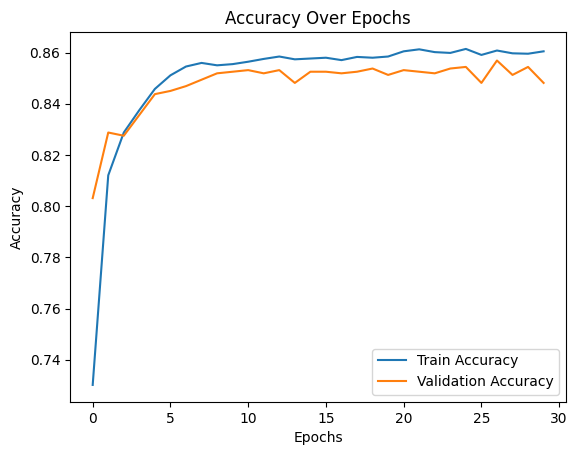

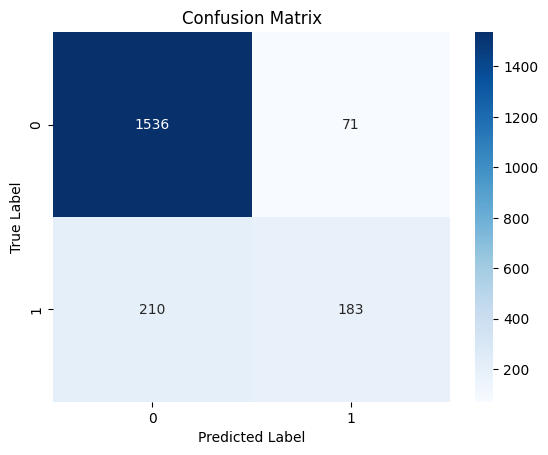

In [11]:
# Plot training and validation accuracy over epochs to visualize learning process
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the confusion matrix for test set predictions to evaluate model performance
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
